The ntoebook will be very similar to the rates_analysis notebook but will be related to just COWD + companions regardless of if the companion is a white dwarf or not

In [1]:
# let's import things
import h5py as h5 
import pandas as pd
from astropy.table import Table
from astropy import units as u
from astropy import constants as const
import numpy as np
import matplotlib.pyplot as plt
plt.rc('text.latex', preamble=r'\usepackage{textgreek}')
plt.rc('font', family='serif')
import sys
import os
from scipy import stats
import seaborn as sns

# Add the subdir to sys.path
sys.path.append('/home/jovyan/home/research_work/useful_py_scripts/')

# Now you can import the module
import useful_fncs 

In [2]:
# reading in the HDF5 file
pathToweights_NS = '/home/jovyan/CompasOutput/v02.46.01/N1e6_Fid_NSNS_AIS/MainRun/COMPAS_Output_wWeights.h5' #path of the hdf5 file

Data_weights_NS = h5.File(pathToweights_NS)

In [3]:
# we want to read in the bse_RLOF to get information about thes different systems

DCO_NS_data = pd.DataFrame() # making a pandas dataframe

for key in Data_weights_NS["BSE_Double_Compact_Objects"].keys(): #looping through the "keys" or paramters in BSE_System_Parameters

    DCO_NS_data[key] = Data_weights_NS["BSE_Double_Compact_Objects"][key][()] # adding these columns to the dataframe

#### Doing rates analysis on the AIS WD hdf5 output

In [24]:
# reading in the HDF5 file
pathToweights_H5 = '/home/jovyan/home/copy_h5_files/v03.08.01/N1e6_MassiveWDWD_NSNS_noRLOFpostCE/COMPAS_Output_wWeights.h5'  #path of the hdf5 file

Data_weights = h5.File(pathToweights_H5,"r")

# let's gather the system parameters group 
SP_WD_data = pd.DataFrame() # making a pandas dataframe

for key in Data_weights["BSE_Double_Compact_Objects"].keys(): #looping through the "keys" or paramters in BSE_System_Parameters

    SP_WD_data[key] = Data_weights["BSE_Double_Compact_Objects"][key][()] # adding these columns to the dataframe

# Rates info directly taking out the 
merger_SEED = Data_weights['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048']['SEED'][()]
rates_WDWD = Data_weights['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048']['merger_rate'][()]
rates_z0_WDWD = Data_weights['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048']['merger_rate_z0'][()]
DCO_mask = Data_weights['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048']['DCOmask'][()]
redshifts = Data_weights['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048']['redshifts'][()]
# rates_info = Data_weights["Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048"]

Data_weights.close()

In [25]:
DCO_data_masked = SP_WD_data[DCO_mask]
DCO_data_masked

,CE_Event_Counter,Coalescence_Time,Eccentricity@DCO,Immediate_RLOF>CE,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Merges_Hubble_Time,Metallicity@ZAMS(1),...,SEED,SemiMajorAxis@DCO,Stellar_Type(1),Stellar_Type(2),Time,dmMT(1),dmMT(2),dmWinds(1),dmWinds(2),mixture_weight
2,1,37.707078,0.0,0,b'2-8 ',b'3 ',0.824641,0.215422,1,0.023832,...,6,0.002158,11,10,2517.727907,0.000000e+00,-1.369279,0.0,0.0,0.021829
5,1,94.333032,0.0,0,b'2 ',b'5 ',0.257000,0.551568,1,0.000210,...,10,0.002408,10,11,2931.019408,0.000000e+00,-0.621921,0.0,0.0,2.702703
9,1,849.908587,0.0,0,b'2 ',b'3 ',0.550875,0.295477,1,0.002044,...,18,0.004368,11,10,1288.845393,0.000000e+00,-1.430243,0.0,0.0,2.702703
10,1,24.801814,0.0,0,b'2-8 ',b'3 ',0.758023,0.289087,1,0.000401,...,21,0.002051,11,11,2587.353649,0.000000e+00,0.000000,0.0,0.0,2.689849
16,1,299.169857,0.0,0,b'1-2 ',b'3 ',0.384656,0.334604,1,0.000165,...,36,0.003046,11,10,994.050945,0.000000e+00,-1.467303,0.0,0.0,2.702703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534961,2,3075.641422,0.0,0,b'4-8 ',b'3 ',1.228777,0.284253,1,0.002294,...,999994,0.008432,11,10,1615.815665,0.000000e+00,-1.318654,0.0,0.0,0.027048
534962,1,915.953821,0.0,0,b'2-8 ',b'3-8 ',0.602708,0.638177,1,0.003230,...,999996,0.006072,11,11,156.452357,1.356410e-09,-0.150245,0.0,0.0,0.029302
534963,1,54.488032,0.0,0,b'2-8 ',b'3 ',0.789751,0.385570,1,0.001743,...,999997,0.002791,11,11,911.765212,0.000000e+00,0.000000,0.0,0.0,0.021514
534964,2,4283.636835,0.0,0,b'6 ',b'5-8 ',0.935614,0.688678,1,0.004949,...,999998,0.010867,11,11,415.150927,6.893652e-10,-0.066604,0.0,0.0,0.026317


In [26]:
# left_over_seeds = np.array(SP_WD_data['SEED']-DCO_data_masked['SEED'])
# left_over_index = np.where(left_over_seeds==0)[0]
# left_over_index
# # DCO_data.iloc[[left_over_index]]
# # DCO_data.iloc[DCO_data['SEED']==left_over_seeds]

In [27]:
# rates = rates_info['merger_rate']

# for i in range(rates_info['merger_rate'][0,:].shape[0]):

#     DCO_data_masked['merger_rate_z'+str(i)] = rates_info['merger_rate'][:,i]

In [28]:
# let's select just for the COWD being at least one of the stars
cowd_bool = np.logical_or(DCO_data_masked['Stellar_Type(1)']==11,DCO_data_masked['Stellar_Type(2)']==11)
DCO_COWD_data = DCO_data_masked[cowd_bool]

In [29]:
DCO_COWD_data

,CE_Event_Counter,Coalescence_Time,Eccentricity@DCO,Immediate_RLOF>CE,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Merges_Hubble_Time,Metallicity@ZAMS(1),...,SEED,SemiMajorAxis@DCO,Stellar_Type(1),Stellar_Type(2),Time,dmMT(1),dmMT(2),dmWinds(1),dmWinds(2),mixture_weight
2,1,37.707078,0.0,0,b'2-8 ',b'3 ',0.824641,0.215422,1,0.023832,...,6,0.002158,11,10,2517.727907,0.000000e+00,-1.369279,0.0,0.0,0.021829
5,1,94.333032,0.0,0,b'2 ',b'5 ',0.257000,0.551568,1,0.000210,...,10,0.002408,10,11,2931.019408,0.000000e+00,-0.621921,0.0,0.0,2.702703
9,1,849.908587,0.0,0,b'2 ',b'3 ',0.550875,0.295477,1,0.002044,...,18,0.004368,11,10,1288.845393,0.000000e+00,-1.430243,0.0,0.0,2.702703
10,1,24.801814,0.0,0,b'2-8 ',b'3 ',0.758023,0.289087,1,0.000401,...,21,0.002051,11,11,2587.353649,0.000000e+00,0.000000,0.0,0.0,2.689849
16,1,299.169857,0.0,0,b'1-2 ',b'3 ',0.384656,0.334604,1,0.000165,...,36,0.003046,11,10,994.050945,0.000000e+00,-1.467303,0.0,0.0,2.702703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534961,2,3075.641422,0.0,0,b'4-8 ',b'3 ',1.228777,0.284253,1,0.002294,...,999994,0.008432,11,10,1615.815665,0.000000e+00,-1.318654,0.0,0.0,0.027048
534962,1,915.953821,0.0,0,b'2-8 ',b'3-8 ',0.602708,0.638177,1,0.003230,...,999996,0.006072,11,11,156.452357,1.356410e-09,-0.150245,0.0,0.0,0.029302
534963,1,54.488032,0.0,0,b'2-8 ',b'3 ',0.789751,0.385570,1,0.001743,...,999997,0.002791,11,11,911.765212,0.000000e+00,0.000000,0.0,0.0,0.021514
534964,2,4283.636835,0.0,0,b'6 ',b'5-8 ',0.935614,0.688678,1,0.004949,...,999998,0.010867,11,11,415.150927,6.893652e-10,-0.066604,0.0,0.0,0.026317


In [30]:
# # what are the stellar types in this system
# print(np.unique(DCO_COWD_data['Stellar_Type(1)']))
# print(np.unique(DCO_COWD_data['Stellar_Type(2)']))

Let's make a dataframe that just selects for at leadt one COWD that is more thatn 0.9 solar masses

In [31]:
# let's select just for the COWD with mass greater than 0.9 solar masses 
cowd_sn_bool = np.logical_or(np.logical_and(DCO_data_masked['Stellar_Type(1)']==11,DCO_data_masked['Mass(1)']>0.9),np.logical_and(DCO_data_masked['Stellar_Type(2)']==11,DCO_data_masked['Mass(2)']>0.9))
DCO_COWD_SN = DCO_data_masked[cowd_sn_bool]
DCO_COWD_SN

,CE_Event_Counter,Coalescence_Time,Eccentricity@DCO,Immediate_RLOF>CE,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Merges_Hubble_Time,Metallicity@ZAMS(1),...,SEED,SemiMajorAxis@DCO,Stellar_Type(1),Stellar_Type(2),Time,dmMT(1),dmMT(2),dmWinds(1),dmWinds(2),mixture_weight
66,2,5621.883924,0.0,0,b'6 ',b'5 ',0.955096,0.663609,1,0.007879,...,174,0.011573,11,11,574.075625,0.000000e+00,0.000000,0.0,0.0,0.020330
534,1,3988.444350,0.0,0,b'2-8 ',b'4-8 ',0.945172,0.757093,1,0.001372,...,1446,0.011087,11,11,121.305478,1.762096e-08,-0.649423,0.0,0.0,0.010848
762,2,761.017341,0.0,0,b'6 ',b'5-8 ',0.964322,0.624621,1,0.007204,...,2189,0.006899,11,11,373.327437,4.943179e-09,-0.144182,0.0,0.0,0.013028
837,2,4839.413990,0.0,0,b'4-8 ',b'3 ',1.243281,0.361601,1,0.002912,...,2369,0.010208,11,11,1232.158026,0.000000e+00,0.000000,0.0,0.0,0.025288
927,2,12558.811906,0.0,0,b'4-8 ',b'5-8 ',0.962410,0.677146,1,0.001972,...,2629,0.014293,11,11,355.543515,1.964144e-09,-0.162562,0.0,0.0,0.037534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534953,1,5700.469851,0.0,0,b'2-8 ',b'3-8 ',1.283413,0.674507,1,0.000403,...,999981,0.013166,11,11,67.474550,7.057316e-08,-0.555866,0.0,0.0,0.006886
534955,1,1077.851627,0.0,0,b'2-8 ',b'3 ',1.055927,0.392090,1,0.005276,...,999984,0.006696,11,11,949.784639,0.000000e+00,0.000000,0.0,0.0,0.003914
534958,1,198.879555,0.0,0,b'2-8 ',b'3 ',0.987520,0.334830,1,0.000266,...,999990,0.004055,11,11,1418.785550,0.000000e+00,0.000000,0.0,0.0,0.005041
534961,2,3075.641422,0.0,0,b'4-8 ',b'3 ',1.228777,0.284253,1,0.002294,...,999994,0.008432,11,10,1615.815665,0.000000e+00,-1.318654,0.0,0.0,0.027048


Let's also select for WD+NS systems

In [32]:
# let's select just for the COWD with mass greater than 0.9 solar masses 
wd_ns_bool = np.logical_or((np.logical_and(DCO_data_masked['Stellar_Type(1)']==11,DCO_data_masked['Stellar_Type(2)']==14)),(np.logical_and(DCO_data_masked['Stellar_Type(2)']==11,DCO_data_masked['Stellar_Type(2)']==14)))
DCO_WD_NS = DCO_data_masked[wd_ns_bool]
DCO_WD_NS

,CE_Event_Counter,Coalescence_Time,Eccentricity@DCO,Immediate_RLOF>CE,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Merges_Hubble_Time,Metallicity@ZAMS(1),...,SEED,SemiMajorAxis@DCO,Stellar_Type(1),Stellar_Type(2),Time,dmMT(1),dmMT(2),dmWinds(1),dmWinds(2),mixture_weight


Getting the total merger rate for a specific redshift

In [33]:
# the merger rate for COWD of at least 0.9 solar masses
cowd_sn_rate_general = np.sum(rates_WDWD[cowd_sn_bool],axis=0)

# the merger rate for all systems with at least a COWD
cowd_rate = np.sum(rates_WDWD[cowd_bool],axis=0)


In [34]:
# extracting the redshifts and rates from Briel et al
# units in the appendix should be in h^-3 y^-1 Gpc^-3 so we must convert below to get yr^-1 Gpc^-3
h_little = 0.6766

redshifts_briel = [
    0, 0.01, 0.03, (0.025+0.050)/2, 0.073, (0.05+0.15)/2, (0.075+0.125)/2, 0.11, 0.11, 0.13, 
    0.15, (0.125+0.175)/2, 0.16, (0.175+0.225)/2, 0.2, 0.25, (0.15+0.35)/2, (0.225+0.275)/2, 
    0.26, 0.3, (0.275+0.325)/2, 0.35, 0.35, 0.42, 0.44, 0.45, 0.45, (0.35+0.55)/2, 0.46, 0.47, 
    0.47, 0.55, 0.55, 0.55, 0.62, 0.65, (0.55+0.75)/2, 0.65, 0.74, 0.75, 0.75, 0.75, 0.8, 0.83, 0.85, 
    0.85, 0.94, 0.95, 0.95, 1.05, 1.1, 1.14, 1.21, 1.23, 1.25, 1.59, 1.61, 1.69, 1.75, 2.25
]

rates_briel = [
    0.77, 0.82, 0.82, 0.81, 0.71, 1.60, 0.76, 1.08, 0.72, 0.58, 0.93, 0.90, 0.41, 1.01, 0.58,
    1.05, 1.14, 1.06, 0.82, 0.99, 1.27, 0.99, 1.05, 1.34, 0.76, 0.90, 1.05, 1.52, 1.40, 1.22, 
    2.33, 0.93, 1.40, 1.52, 3.76, 1.40, 2.01, 1.43, 2.30, 1.49, 1.98, 1.69, 2.45, 3.79, 2.27, 
    1.66, 1.31, 2.22, 2.24, 2.30, 2.16, 2.06, 3.85, 2.45, 1.87, 1.31, 1.22, 2.97, 2.10, 1.43
]

# converting the rates to the correct units
rates_briel = np.array(rates_briel)
converted_rates_briel = (rates_briel*(10**5))*(h_little**3)

## uncertainties
lower_limits = [
    -0.10, -0.26, -0.32, -0.24, -0.08, -0.85, -0.13, -0.29, -0.20, -0.18, -0.67, -0.10, -0.26, -0.09, 
    -0.23, -0.76, -0.35, -0.08, -0.20, -0.44, -0.10, -0.55, -0.17, -0.93, -0.39, -0.44, -0.17, -0.38, 
    -0.50, -0.17, -0.79, -0.41, -0.17, -0.26, -1.66, -0.15, -0.52, -0.50, -1.20, -0.55, -0.61, -0.17, 
    -0.54, -0.79, -0.64, -0.15, -0.55, -0.73, -0.23, -0.82, -0.35, -0.53, -0.85, -0.82, -0.64, -0.64, 
    -0.67, -1.08, -0.87, -1.11
]

lower_limits = np.array(lower_limits)
converted_lower_limits = (lower_limits*(10**5)*(h_little**3))

upper_limits = [
    0.10, 0.26, 0.32, 0.33, 0.08, 1.46, 0.15, 0.29, 0.08, 0.20, 0.67, 0.11, 0.26, 0.09, 0.23,
    1.75, 0.38, 0.09, 0.20, 0.47, 0.11, 0.55, 0.17, 1.22, 0.67, 0.44, 0.17, 0.32, 0.50, 0.17, 
    1.08, 0.41, 0.17, 0.29, 2.57, 0.15, 0.55, 0.50, 0.96, 0.79, 0.61, 0.17, 0.67, 0.96, 0.64, 
    0.15, 0.64, 0.73, 0.23, 0.82, 0.35, 0.70, 1.05, 0.73, 0.90, 0.99, 1.14, 1.57, 1.31, 2.77
]

upper_limits = np.array(upper_limits)
converted_upper_limits = (upper_limits*(10**5)*(h_little**3))

# multiplied the lower errors by -1 so make them positive to avoid the plt.errorbar error 
y_error = [-1*(converted_lower_limits), converted_upper_limits]
# y_error = [converted_rates_briel+ converted_lower_limits, converted_rates_briel + converted_upper_limits]
# converted_y_error = y_error*(10**5)*(0.6766)

# error_bars = y_error


(1000, 1000000)

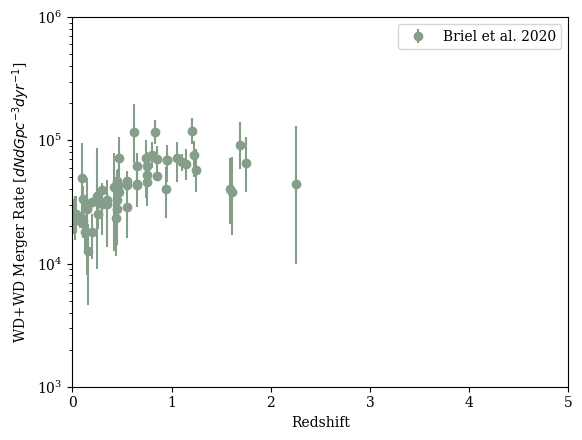

In [35]:
# testing to make sure the Briel et al. rates look good

## seeing if this plot matches Max Briel's paper
plt.errorbar(redshifts_briel,converted_rates_briel,yerr=y_error, fmt='o', color = '#849E8A',label='Briel et al. 2020')

plt.yscale('log')
plt.ylabel(r"WD+WD Merger Rate [$dNdGpc^{-3}dyr^{-1}$]")
plt.xlabel(r"Redshift")
# plt.title(r"Binary White Dwarf (WD+WD) Merger Rate Distirbution")
plt.legend()
plt.xlim(0,5)
plt.ylim(10**3,10**6)

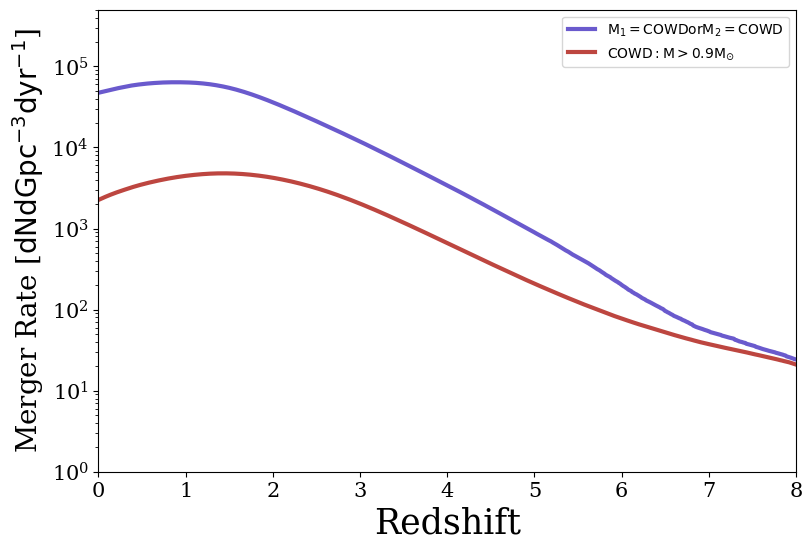

In [36]:
redshifts = redshifts
plt.figure(figsize=(9,6))
plt.plot(redshifts[()],cowd_rate,linewidth=3,color='slateblue',label=r'$\mathrm{M_{1}=COWD or M_{2}=COWD}$') # all COWD
plt.plot(redshifts[()],cowd_sn_rate_general,linewidth=3,color='#BD4640',label=r'$\mathrm{COWD: M > 0.9 M_{\odot}}$') # all COWD > 0.9 soalr masses

## axis
plt.xlim(0,8)
plt.ylim(10**0,5*10**5)
plt.yscale('log')
plt.ylabel(r"Merger Rate [$\mathrm{dNdGpc^{-3}dyr^{-1}}$]",fontsize=20)
plt.xlabel(r"Redshift",fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.title(r"Binary White Dwarf (WD+WD) Merger Rate Distirbution")
plt.legend()

Let's now look at the rate for different selections for the system. Let's look at COWD with a main sequence M < 0.7 m_sol (0), main sequence M > 0.7 m_sol (1), naked helium main squence (7), naked helium (sub) giant (8), HeWD (10), COWD (11), ONeWD (12) and i am not sure what 9 is

In [37]:
# let's create different dataframes for each of these companion cases

# stellar type == 0
low_mass_ms_bool = np.logical_or(DCO_data_masked['Stellar_Type(1)']==0,DCO_data_masked['Stellar_Type(2)']==0)
low_mass_ms_DATA = DCO_data_masked[low_mass_ms_bool]

# stellar type == 1
high_mass_ms_bool = np.logical_or(DCO_data_masked['Stellar_Type(1)']==1,DCO_data_masked['Stellar_Type(2)']==1)
high_mass_ms_DATA = DCO_data_masked[high_mass_ms_bool]

# stellar type == 7
helium_ms_bool = np.logical_or(DCO_data_masked['Stellar_Type(1)']==7,DCO_data_masked['Stellar_Type(2)']==7)
helium_ms_DATA = DCO_data_masked[helium_ms_bool]

# stellar type == 8
helium_subgiant_bool = np.logical_or(DCO_data_masked['Stellar_Type(1)']==8,DCO_data_masked['Stellar_Type(2)']==8)
helium_subgiant_DATA = DCO_data_masked[helium_subgiant_bool]

# # stellar type == 9
# helium_subgiant_bool = np.logical_or(DCO_data_masked['Stellar_Type(1)']==9,DCO_data_masked['Stellar_Type(2)']==9)
# helium_subgiant_DATA = DCO_data_masked[helium_subgiant_bool]

# stellar type == 10
hewd_bool = np.logical_or(DCO_data_masked['Stellar_Type(1)']==10,DCO_data_masked['Stellar_Type(2)']==10)
hewd_DATA = DCO_data_masked[hewd_bool]

# stellar type == 11
cowd_bool = np.logical_and(DCO_data_masked['Stellar_Type(1)']==11,DCO_data_masked['Stellar_Type(2)']==11)
cowd_DATA = DCO_data_masked[cowd_bool]

# stellar type == 12
onewd_bool = np.logical_or(DCO_data_masked['Stellar_Type(1)']==12,DCO_data_masked['Stellar_Type(2)']==12)
onewd_DATA = DCO_data_masked[onewd_bool]


In [38]:
# merger_rate_0_bool = cowd_sn_bool*low_mass_ms_bool
# merger_rate_0 = np.sum(rates_WDWD[merger_rate_0_bool],axis=0)

In [39]:
# gettign the mean merger rate per system for stellar type = 0
merger_rate_0 = np.sum(rates_WDWD[low_mass_ms_bool*cowd_sn_bool],axis=0)


# gettign the mean merger rate per system for stellar type = 1
merger_rate_1 = np.sum(rates_WDWD[high_mass_ms_bool*cowd_sn_bool],axis=0)


# gettign the mean merger rate per system for stellar type = 7
merger_rate_7 = np.sum(rates_WDWD[helium_ms_bool*cowd_sn_bool],axis=0)


# gettign the mean merger rate per system for stellar type = 8
merger_rate_8 = np.sum(rates_WDWD[helium_subgiant_bool*cowd_sn_bool],axis=0)


# gettign the mean merger rate per system for stellar type = 10
merger_rate_10 = np.sum(rates_WDWD[hewd_bool*cowd_sn_bool],axis=0)


# gettign the mean merger rate per system for stellar type = 11
merger_rate_11 = np.sum(rates_WDWD[cowd_bool*cowd_sn_bool],axis=0)


# gettign the mean merger rate per system for stellar type = 12
merger_rate_12 = np.sum(rates_WDWD[onewd_bool*cowd_sn_bool],axis=0)


In [40]:
# let's add the flags for specific calssifications of SN Ia

SN_Ia_HVS,two_star_SNIA,Champagne_Supernova = useful_fncs.check_if_SNIA(DCO_COWD_SN['Mass(1)'],DCO_COWD_SN['Mass(2)'])
# adding the flags to the dataframe
DCO_COWD_SN = DCO_COWD_SN.assign(SN_Ia_HVS = SN_Ia_HVS)
DCO_COWD_SN = DCO_COWD_SN.assign(two_star_SNIA = two_star_SNIA)
DCO_COWD_SN = DCO_COWD_SN.assign(Champagne_Supernova = Champagne_Supernova)

In [41]:
rates_reshift_array = rates_WDWD[cowd_sn_bool]

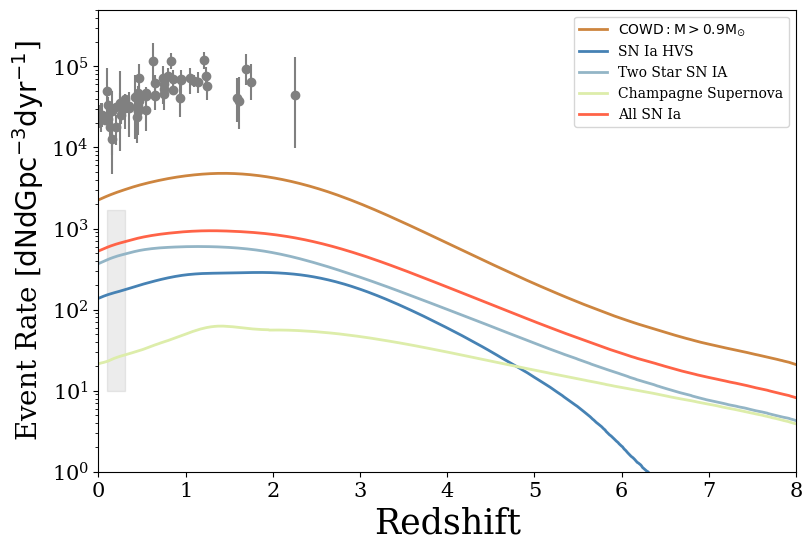

In [ ]:
# disitninuish things merging before CE or after CE or due to GW

plt.figure(figsize=(9,6))
# plt.plot(redshifts[()],total_merger_rate_COWD,linewidth=2,color='lightsteelblue',label=r'$\mathrm{COWD + Companion}$') # all COWD
plt.plot(redshifts[()],cowd_sn_rate_general,linewidth=2,color='peru',label=r'$\mathrm{COWD: M > 0.9 M_{\odot}}$')
# different types of SN Ia
plt.plot(redshifts[()],np.sum(rates_reshift_array[SN_Ia_HVS,:],axis=0),linewidth=2,color='steelblue',label='SN Ia HVS')
plt.plot(redshifts[()],np.sum(rates_reshift_array[two_star_SNIA,:],axis=0),linewidth=2,color='#93B5C6',label='Two Star SN IA')
plt.plot(redshifts[()],np.sum(rates_reshift_array[Champagne_Supernova,:],axis=0),linewidth=2,color='#DDEDAA',label='Champagne Supernova')

any_SNIA = np.logical_or(DCO_COWD_SN['Champagne_Supernova']== True,
                         np.logical_or(DCO_COWD_SN['SN_Ia_HVS']==True,DCO_COWD_SN['two_star_SNIA']==True))
plt.plot(redshifts[()],np.sum(rates_reshift_array[any_SNIA,:],axis=0),linewidth=2,color='tomato',label='All SN Ia')

# sum of rates = 
#rates_sum = np.array(merger_rate_0) + np.array(merger_rate_1) + np.array(merger_rate_7) + np.array(merger_rate_8) + np.array(merger_rate_10) + np.array(merger_rate_11) + np.array(merger_rate_12)
#plt.plot(redshifts[()],rates_sum,linewidth=3,color='#BD4640',label=r'Sum of Rates') # stellar type = 12

# plt.plot(redshifts[()],merger_rate_11,linewidth=3,color='peru',label=r'$\mathrm{COWD + COWD}$') # stellar type = 11
# plt.plot(redshifts[()],merger_rate_10,linewidth=3,color='green',label=r'$\mathrm{COWD + HeWD}$') # stellar type = 10
# plt.plot(redshifts[()],merger_rate_12,linewidth=3,color='steelblue',label=r'$\mathrm{COWD + ONeWD}$') # stellar type = 12
# plt.plot(redshifts[()],merger_rate_8,linewidth=3,color='slateblue',label=r'$\mathrm{COWD + Naked}$ $\mathrm{He}$ $\mathrm{(Sub)}$ $\mathrm{Giant}$') # stellar type = 8

# plt.plot(redshifts[()],merger_rate_0,linewidth=3,color='#93B5C6',label=r'$\mathrm{COWD + Main Sequence}$ $\mathrm{M < 0.7 M_{\odot}}$') # stellar type = 0
# plt.plot(redshifts[()],merger_rate_1,linewidth=3,color='#DDEDAA',label=r'$\mathrm{COWD + Main Sequence}$ $\mathrm{M > 0.7 M_{\odot}}$') # stellar type = 1plt.plot(redshifts[()],merger_rate_7,linewidth=3,color='#F0CF65',label=r'$\mathrm{COWD + Naked}$ $\mathrm{He}$ $\mathrm{Main}$ $\mathrm{Sequence}$') # stellar type = 7

## seeing if this plot matches Max Briel's paper
plt.errorbar(redshifts_briel,converted_rates_briel,yerr=y_error, fmt='o', color = 'gray')#,label='Briel et al. 2020')

# NSNS rate
# plt.plot(redshifts_NS[()],total_merger_rate_NS_version,linewidth=2,color='forestgreen')#,label=r'$\mathrm{BNS}$')

## LVK BNS rate
plt.fill_between([0.1,0.3], 
                10,
                1700, 
                alpha=0.15, 
                color="grey")#,label=r'LVK BNS Rate $\mathrm{z=0.2}$')

## axis
plt.xlim(0,8)
plt.ylim(10**0,5*10**5)
plt.yscale('log')
plt.ylabel(r"Event Rate [$\mathrm{dNdGpc^{-3}dyr^{-1}}$]",fontsize=20)
plt.xlabel(r"Redshift",fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.title(r"Binary White Dwarf (WD+WD) Merger Rate Distirbution")
plt.legend()

# ## save figure:
# plt.savefig("redshift_rates_noRLOFpostce.png",bbox_inches='tight',pad_inches=0.1)

Let's look at the merger rate when the COWD is above 0.9 solar masses but below 1.4 solar masses

In [ ]:
sub_chandra_bool = np.logical_or(np.logical_and(DCO_data_masked['Stellar_Type(1)']==11,DCO_data_masked['Mass(1)']<1.4),np.logical_and(DCO_data_masked['Stellar_Type(2)']==11,DCO_data_masked['Mass(2)']<1.4))
SUB_CHAN_DATA = DCO_data_masked[sub_chandra_bool]
SUB_CHAN_DATA

In [ ]:
# gettign the mean merger rate per system
total_merger_rate_sub_chan = []

# looping through each collection of merger rates
for s in range(rates_info['merger_rate'][0,:].shape[0]):

    # selecting the mean merger rate for each reshift bin
    tota_rate = np.sum(SUB_CHAN_DATA[SUB_CHAN_DATA.columns[20+s]])
    total_merger_rate_sub_chan.append(tota_rate)

In [ ]:
redshifts = rates_info['redshifts']
plt.figure(figsize=(9,6))
plt.plot(redshifts[()],total_merger_rate_sub_chan,linewidth=3,color='#BD4640',label=r'$\mathrm{Sub-Chandrasekhar}$ $\mathrm{Systems}$') # all COWD
## axis
plt.xlim(0,8)
plt.ylim(10**0,5*10**5)
plt.yscale('log')
plt.ylabel(r"Merger Rate [$\mathrm{dNdGpc^{-3}dyr^{-1}}$]",fontsize=20)
plt.xlabel(r"Redshift",fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.title(r"Binary White Dwarf (WD+WD) Merger Rate Distirbution")
plt.legend()

In [ ]:
# disitninuish things merging before CE or after CE or due to GW

redshifts = rates_info['redshifts']
plt.figure(figsize=(9,6))

plt.plot(redshifts[()],total_merger_rate_COWD,linewidth=3,color='#DDEDAA',label=r'$\mathrm{COWD + Companion]$') # all COWD + companion

# sum of rates = 
rates_sum = np.array(merger_rate_7) + np.array(merger_rate_8) + np.array(merger_rate_10) + np.array(merger_rate_11) + np.array(merger_rate_12)
plt.plot(redshifts[()],rates_sum,linewidth=3,color='grey',label=r'Sum of Rates') # stellar type = 12

## seeing if this plot matches Max Briel's paper
plt.errorbar(redshifts_briel,converted_rates_briel,yerr=y_error, fmt='o', color = '#849E8A')#,label='Briel et al. 2020')

# NSNS rate
plt.plot(redshifts_NS[()],total_merger_rate_NS_version,linewidth=4,color='olivedrab')#,label=r'$\mathrm{BNS}$')

## LVK BNS rate
plt.fill_between([0.1,0.3], 
                10,
                1700, 
                alpha=0.15, 
                color="grey")#,label=r'LVK BNS Rate $\mathrm{z=0.2}$')

## axis
plt.xlim(0,8)
plt.ylim(10**0,5*10**5)
plt.yscale('log')
plt.ylabel(r"Merger Rate [$\mathrm{dNdGpc^{-3}dyr^{-1}}$]",fontsize=20)
plt.xlabel(r"Redshift",fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.title(r"Binary White Dwarf (WD+WD) Merger Rate Distirbution")
plt.legend()

## save figure:
# plt.savefig("redshifts_rates_COWD_companion.pdf",bbox_inches='tight',pad_inches=0.1)

In [ ]:
# checking the length of the CE bool for the He Main Sequence
print(sum(helium_subgiant_DATA['Immediate_RLOF>CE']==True))
print(len(helium_subgiant_DATA))


Let's look at eh helium white dwarf first with these COWD

In [ ]:
hewd_DATA

In [ ]:
plt.hist(low_mass_ms_DATA['Mass(1)']+low_mass_ms_DATA['Mass(2)'])

In [ ]:
plt.hist(high_mass_ms_DATA['Mass(1)']+high_mass_ms_DATA['Mass(2)'])